In [1]:
using Plots

In [2]:
function lms_algorithm(𝑌
        , Ỹ # Ỹ Desired Output
        , μ
        , num_taps
)
    N = length(𝑌) # num samples
    W = zeros(num_taps)
    Ŷ = zeros(N) # Ŷ Estimated Output

    for n in num_taps:N
        xₙ = 𝑌[n-num_taps+1:n]
        ŷₙ = W ⋅ xₙ
        ϵ  = Ỹ[n] - ŷₙ
        W .+= μ * ϵ * xₙ
        Ŷ[n] = ŷₙ
    end

    return Ŷ
end

lms_algorithm (generic function with 1 method)

In [3]:
# Parameters
A = 1.0        # Amplitude of the sinusoid
f = 5.0        # Frequency of the sinusoid
ϕ = π/4        # Phase of the sinusoid
σ = 0.2        # Standard deviation of noise
N = 1000       # Number of samples
μ = 0.01       # LMS step size
num_taps = 10; # Number of filter taps
vₙ = σ * randn(N); 

In [4]:
# Generate a noisy sinusoidal signal
# noisy_signal, clean_signal = generate_noisy_sinusoid(A, f, ϕ, σ, N);
t = 0:1/(N-1):1
xₙ = A * sin.(2π .* f .* t .+ ϕ) # clean signal
yₙ = xₙ + vₙ; # noisy signal

In [5]:
using LinearAlgebra

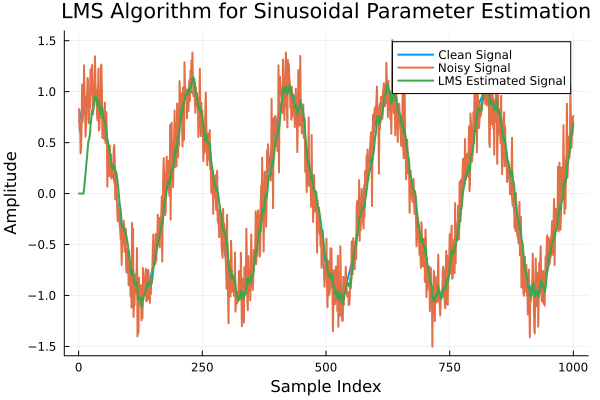

In [6]:
# Apply LMS algorithm to estimate sinusoidal parameters
ŷₙ = lms_algorithm(yₙ, xₙ, μ, num_taps) # estimated signal

# Plot the results
plot([xₙ, yₙ, ŷₙ];
    label=["Clean Signal" "Noisy Signal" "LMS Estimated Signal"]
    , xlabel="Sample Index", ylabel="Amplitude"
    , title="LMS Algorithm for Sinusoidal Parameter Estimation"
    , linewidth=2
)